# DS-GA 1007 - Programming for Data Science
## Course Project - Fall 2022 - Professor Jeremy Curuksu 
## Group "Pip Install Grade A"

__Students:__ Chloe Zheng (cz1300@nyu.edu) and Rodrigo Kreis de Paula (rk4197@nyu.edu) <br>

All meterials for this Project are available on the <a href="https://github.com/rk4197/DS-GA_1007_Project" target="_blank">GitHub Repo</a>.

<div class="alert alert-block alert-info">
<b>Important Information</b> 

All the datafiles we'll use during this Project were obtained on <a href="https://www.nyc.gov/site/finance/taxes/property-annualized-sales-update.page" target="_blank">this link</a>. We downloaded 100 files in total: one file per NYC borough, per year. Since there are 5 boroughs (Manhattan, Queens, Brooklyn, Bronx and Staten Island) and our analysis encompasses 20 years (2003 - 2022), there were 100 Excel files in total.
    
<br> 
We then transformed each Excel file into a CSV file and concatenated all of them with Jupyter Notebook, generating a single file called "data.csv" that we'll use during the project. This file can be also downloaded from the <a href="https://drive.google.com/file/d/1RkUYtr-iBkwJdaLfi36j8cWXMIvuF9Dr/view?usp=sharing" target="_blank">Google Shared Folder</a> we created for this Project. <br>
<br>
Finally, it is import to mention that the data corresponding to 2022 goes until October (inclusive), which is the latest publicly available information. <br>
<br>
For more information about the data, please check the following publicly available documents:<br>
* Glossary of Terms for Property Sales Files (link <a href="https://www.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf"> here)</a>. <br>
* NYC Building Class Code Descriptions (link <a href="https://www.nyc.gov/assets/finance/jump/hlpbldgcode.html"> here)</a>.

</div>

### Section I - Setting up

In [214]:
# importing packages to be used
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import calendar
import seaborn as sns

In [3]:
# importing data
filepath = './data' # modify the filepath accordingly
file = 'data.csv' # modify the data name accordingly

data = pd.read_csv(os.path.join(filepath,file))

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_9552/2756348622.py:5: DtypeWarning: Columns (7,12,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(filepath,file))


In [4]:
# identify a path to save figures
figurepath = "./figures"

### Section II - Data Preview

In [5]:
# getting the total number of rows and attributes (columns)
data.shape

(1845520, 22)

In [6]:
# showing the first five rows
data.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,376.0,43.0,NaN,S1,743 EAST 6TH STREET,...,1.0,1.0,2.0,2090.0,3680.0,1940.0,1.0,S1,3200000.0,2019-07-24
1,1,1.0,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390.0,61.0,NaN,A4,189 EAST 7TH STREET,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1.0,A4,0.0,2019-09-25
2,2,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404.0,1.0,NaN,B9,166 AVENUE A,...,2.0,0.0,2.0,1510.0,4520.0,1900.0,1.0,B9,0.0,2019-07-22
3,3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,56.0,NaN,C0,263 EAST 7TH STREET,...,3.0,0.0,3.0,2430.0,3600.0,1899.0,1.0,C0,6300000.0,2019-04-30
4,4,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,393.0,9.0,NaN,C0,604 EAST 11TH STREET,...,3.0,0.0,3.0,2375.0,5110.0,1939.0,1.0,C0,0.0,2019-10-24


In [7]:
# showing the last five rows
data.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1845515,18192,1.0,UPPER EAST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1528.0,1010.0,NaN,R4,"200 EAST 83RD STREET, 4D",...,1,NaN,1,NaN,NaN,2021.0,2.0,R4,"2,331,793",2022-10-31
1845516,18193,1.0,UPPER WEST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1120.0,17.0,NaN,D4,"17 WEST 67TH STREET, 10A",...,NaN,NaN,NaN,NaN,NaN,1930.0,2.0,D4,"1,100,000",2022-10-31
1845517,18194,1.0,UPPER WEST SIDE (59-79),10 COOPS - ELEVATOR APARTMENTS,2,1185.0,32.0,NaN,D4,"320 WEST 76 STREET, 5A",...,NaN,NaN,NaN,NaN,NaN,1948.0,2.0,D4,"730,000",2022-10-31
1845518,18195,1.0,UPPER WEST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,1151.0,1334.0,NaN,R4,"555 WEST 59TH, 7G",...,1,NaN,1,NaN,NaN,2007.0,2.0,R4,"1,703,000",2022-10-31
1845519,18196,1.0,UPPER WEST SIDE (96-116),17 CONDO COOPS,2,1883.0,1002.0,NaN,R9,"545 WEST 111TH STREET, 5B",...,NaN,NaN,NaN,NaN,NaN,1930.0,2.0,R9,"1,370,000",2022-10-31


In [8]:
# we see that there are some columns that were not shown. Let's exhibit all of them
data.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

### Section III - Data Manipulation & Cleaning

In [9]:
# first, let's delete the first column named 'Unnamed: 0' which does not contain any information
del data['Unnamed: 0']

In [10]:
# printing the new shape after deleting the column
data.shape

(1845520, 21)

__Now we have 21 attributes (including the dependent variable 'SALES PRICE'), in accordance to the data information publicly available. Also, we note that there are 1.84 mm registers in total.__

In [11]:
# let's obtain more information about the types of each attribute
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845520 entries, 0 to 1845519
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   BOROUGH                         float64
 1   NEIGHBORHOOD                    object 
 2   BUILDING CLASS CATEGORY         object 
 3   TAX CLASS AT PRESENT            object 
 4   BLOCK                           float64
 5   LOT                             float64
 6   EASE-MENT                       object 
 7   BUILDING CLASS AT PRESENT       object 
 8   ADDRESS                         object 
 9   APARTMENT NUMBER                object 
 10  ZIP CODE                        float64
 11  RESIDENTIAL UNITS               object 
 12  COMMERCIAL UNITS                float64
 13  TOTAL UNITS                     object 
 14  LAND SQUARE FEET                object 
 15  GROSS SQUARE FEET               object 
 16  YEAR BUILT                      float64
 17  TAX CLASS AT TIME OF SALE  

In [12]:
# we'll convert the columns to best possible dtypes using dtypes
data = data.convert_dtypes()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845520 entries, 0 to 1845519
Data columns (total 21 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   BOROUGH                         Int64 
 1   NEIGHBORHOOD                    string
 2   BUILDING CLASS CATEGORY         string
 3   TAX CLASS AT PRESENT            string
 4   BLOCK                           Int64 
 5   LOT                             Int64 
 6   EASE-MENT                       string
 7   BUILDING CLASS AT PRESENT       string
 8   ADDRESS                         string
 9   APARTMENT NUMBER                string
 10  ZIP CODE                        Int64 
 11  RESIDENTIAL UNITS               object
 12  COMMERCIAL UNITS                Int64 
 13  TOTAL UNITS                     object
 14  LAND SQUARE FEET                object
 15  GROSS SQUARE FEET               object
 16  YEAR BUILT                      Int64 
 17  TAX CLASS AT TIME OF SALE       Int64 
 18  BU

__We observe that several columns have mixed datatypes and are of type 'object'. We manually preprocess this data to be converted to the same type. We also note that 'SALE DATE' may be of datetime64, so we'll change this type.__

In [13]:
# attributes 'SALE PRICE', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', and 'GROSS SQUARE FEET' are type object
def preprocess_str_ints(price):
    if type(price) == str:
        price = int(float(price.replace(",","")))
    return price

data["SALE PRICE"] = data["SALE PRICE"].apply(preprocess_str_ints)
data["RESIDENTIAL UNITS"] = data["RESIDENTIAL UNITS"].apply(preprocess_str_ints)
data["TOTAL UNITS"] = data["TOTAL UNITS"].apply(preprocess_str_ints)
data["LAND SQUARE FEET"] = data["LAND SQUARE FEET"].apply(preprocess_str_ints)
data["GROSS SQUARE FEET"] = data["GROSS SQUARE FEET"].apply(preprocess_str_ints)

# attribute 'SALE DATE' can be of type datetime64
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])

# we confirm correct types
data = data.convert_dtypes()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845520 entries, 0 to 1845519
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   BOROUGH                         Int64         
 1   NEIGHBORHOOD                    string        
 2   BUILDING CLASS CATEGORY         string        
 3   TAX CLASS AT PRESENT            string        
 4   BLOCK                           Int64         
 5   LOT                             Int64         
 6   EASE-MENT                       string        
 7   BUILDING CLASS AT PRESENT       string        
 8   ADDRESS                         string        
 9   APARTMENT NUMBER                string        
 10  ZIP CODE                        Int64         
 11  RESIDENTIAL UNITS               Int64         
 12  COMMERCIAL UNITS                Int64         
 13  TOTAL UNITS                     Int64         
 14  LAND SQUARE FEET                Int64         
 15

In [14]:
# now let's look for missing values 
data.isnull().sum()

BOROUGH                               10
NEIGHBORHOOD                          10
BUILDING CLASS CATEGORY               10
TAX CLASS AT PRESENT                 590
BLOCK                                 10
LOT                                   10
EASE-MENT                         413020
BUILDING CLASS AT PRESENT            590
ADDRESS                               10
APARTMENT NUMBER                  316583
ZIP CODE                              44
RESIDENTIAL UNITS                  73231
COMMERCIAL UNITS                  107238
TOTAL UNITS                        67738
LAND SQUARE FEET                  112732
GROSS SQUARE FEET                 112731
YEAR BUILT                         23042
TAX CLASS AT TIME OF SALE             10
BUILDING CLASS AT TIME OF SALE        10
SALE PRICE                            10
SALE DATE                             10
dtype: int64

__We observe that if we decide to drop a row containing a null value in any column, we will lose at least 22% of the registers since the number of rows missing the feature 'EASE-MENT' equals 413,020. Therefore, for the purpose of the next steps in this Project, we'll drop only the rows whose attribute 'SALE PRICE' equals to zero. It is important to mention that 'SALE PRICE' equal to null is different than 'SALE PRICE' equal to zero. This latter situation will be examined in the sequence.__

In [15]:
# let's drops that rows that contain 'SALE PRICE' equal to null.
data = data.dropna(subset=['SALE PRICE'])
# now let's check the new situation of missing values
data.isnull().sum()

BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 580
BLOCK                                  0
LOT                                    0
EASE-MENT                         413010
BUILDING CLASS AT PRESENT            580
ADDRESS                                0
APARTMENT NUMBER                  316573
ZIP CODE                              34
RESIDENTIAL UNITS                  73221
COMMERCIAL UNITS                  107228
TOTAL UNITS                        67728
LAND SQUARE FEET                  112722
GROSS SQUARE FEET                 112721
YEAR BUILT                         23032
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
dtype: int64

__For final preprocessing, we check the columns that we will use to analyze sales. We decide to add 'BOROUGH_NAMES' for interpretability, remove 'NEIGHBORHOOD' whitespaces, and add 'SALE YEAR' and 'SALE MONTH' for analysis.__

In [16]:
# now, let's add Borough Names for interpretability
borough_names = ["MANHATTAN", "BRONX", "BROOKLYN", "QUEENS", "STATEN ISLAND"]
borough_name_data = [borough_names[int(i)-1] for i in data["BOROUGH"]]
data.insert(loc=1, column='BOROUGH_NAME', value=borough_name_data)

# next, we'll clean Neighborhood whitespaces
data["NEIGHBORHOOD"] = data["NEIGHBORHOOD"].str.replace(" ", "")

# let's also add the 'SALE YEAR' and 'SALE MONTH'
data["SALE YEAR"] = data["SALE DATE"].dt.year.values
data["SALE MONTH"] = data["SALE DATE"].dt.month_name().values

<div class="alert alert-block alert-warning">
<b>Now, let's handle the 'SALE PRICE' equal to zero. </b> Based on the Glossary of Terms for Property Sales Files, we know that "A \$0 sale indicates that there was a transfer of ownership without a cash consideration. There can be a number of reasons for a \$0 sale including transfers of ownership from parents to children."
</div>

In [17]:
# first let's quantify the number of properties with $0 sale
print('total number of registers with $0 value:', int(data['SALE PRICE'][data['SALE PRICE'] == 0].describe()[0]))
print('total number of registers:', len(data))
ratio = data['SALE PRICE'][data['SALE PRICE'] == 0].describe()[0] / len(data)
print('representativeness of registers with $0 value:', "{0:.2f}%".format(ratio * 100))

total number of registers with $0 value: 554193
total number of registers: 1845510
representativeness of registers with $0 value: 30.03%


In [18]:
# therefore, given that the number of transactions with $0 value is substantial, we'll divide the original 
# dataframe we're working on into two: one with 'SALE PRICE' higher than $0 and other with 'SALE PRICE' equal 
# to $0.

# first, we copy the original dataframes
data_value = data.copy()
data_zero_value = data.copy()

# now, for each new dataframe, we apply the condition
data_value= data_value[data_value['SALE PRICE'] != 0]
data_zero_value = data_zero_value[data_zero_value['SALE PRICE'] == 0]

In [19]:
# Finally, to analyze sales across the last 2 decades, we set 'SALE DATE' as index
data_by_sales = data_value.copy()
data_by_sales = data_by_sales.set_index("SALE DATE")
print(data_by_sales.index[:5])

data_by_sales_zero = data_zero_value.copy()
data_by_sales_zero = data_by_sales_zero.set_index("SALE DATE")
print(data_by_sales_zero.index[:5])

DatetimeIndex(['2019-07-24', '2019-04-30', '2019-08-08', '2019-01-09',
               '2019-12-12'],
              dtype='datetime64[ns]', name='SALE DATE', freq=None)
DatetimeIndex(['2019-09-25', '2019-07-22', '2019-10-24', '2019-09-11',
               '2019-01-16'],
              dtype='datetime64[ns]', name='SALE DATE', freq=None)


### Section IV - Analysis

In [39]:
# first, we define some helper functions for our analysis
def get_saleprice_stats_groupby(data, column_name):
    '''Get mean, median, min, and max of sales prices grouped by a specified column'''
    mean_price = data.groupby([column_name])["SALE PRICE"].mean()
    median_price = data.groupby([column_name])["SALE PRICE"].median()
    min_price = data.groupby([column_name])["SALE PRICE"].min()
    max_price = data.groupby([column_name])["SALE PRICE"].max()
    return mean_price, median_price, min_price, max_price 


def get_resampled_sales_data(data, func=''):
    '''Get resampled sales price data based on a function. Return resampled prices based on week, month, and year'''
    assert type(data.index) == pd.core.indexes.datetimes.DatetimeIndex, "TypeError: Expected data index to DatetimeIndex" 
    weekly, monthly, yearly = None, None, None
    if func == "count":
        weekly = data["SALE PRICE"].resample('W').count()
        monthly = data["SALE PRICE"].resample('M').count()
        yearly = data["SALE PRICE"].resample('Y').count()
    elif func == "mean":
        weekly = data["SALE PRICE"].resample('W').mean()
        monthly = data["SALE PRICE"].resample('M').mean()
        yearly = data["SALE PRICE"].resample('Y').mean()
    elif func == "median":
        weekly = data["SALE PRICE"].resample('W').median()
        monthly = data["SALE PRICE"].resample('M').median()
        yearly = data["SALE PRICE"].resample('Y').median()
    elif func == "sum":
        weekly = data["SALE PRICE"].resample('W').sum()
        monthly = data["SALE PRICE"].resample('M').sum()
        yearly = data["SALE PRICE"].resample('Y').sum()
    else:
        print("ERROR: Please specify function to resample data")
    return weekly, monthly, yearly


def plot_resampled_sales_data(weekly=None, monthly=None, yearly=None, 
                             title='title', ylabel='ylabel', linestyle="solid", file_path=''):
    '''Plot resampled data based on week, month, and year in one plot.'''
    if type(weekly) == pd.core.series.Series:
        weekly.plot(label="weekly", color='orange', linestyle=linestyle, figsize=(12,8))
    if type(monthly) == pd.core.series.Series:
        monthly.plot(label="monthly", color='green', linestyle=linestyle, figsize=(12,8))
    if type(yearly) == pd.core.series.Series:
        yearly.plot(label="yearly", color='blue', linestyle=linestyle, figsize=(12,8))
    plt.title(title, y=1.05, size=14)
    plt.ylabel(ylabel)
    plt.legend()
    if file_path != '':
        plt.savefig(os.path.join(file_path, title), transparent=True)
    plt.show()

### (A) Sales over 2003-2022

##### 1. Overall Sales

<b> We are interested in how sales have changed over time. First, we will visualize the total number of resampled sales (weekly, monthly, and yearly) for sales equal to \\$0 (data_zero_value) and sales greater than \\$0 (data_value). We will also visualize the mean, median, and sum of resampled sales greater than $0. <b>

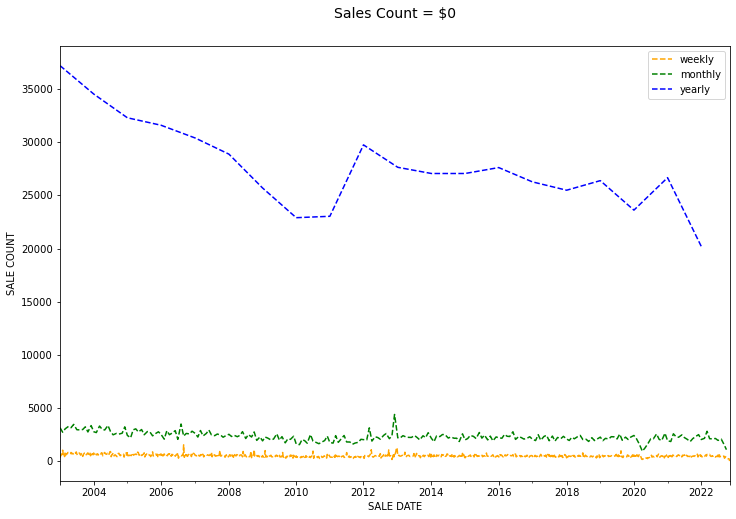

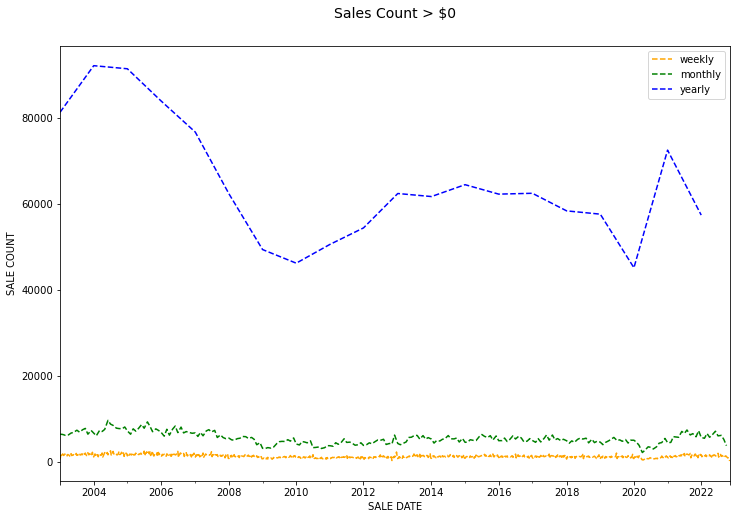

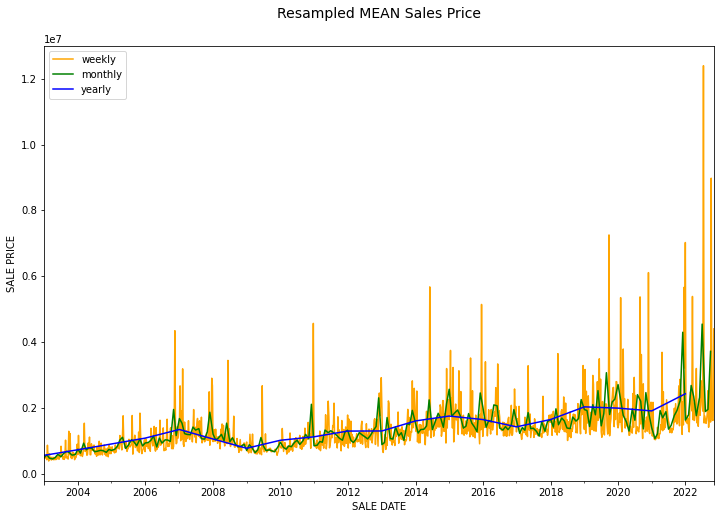

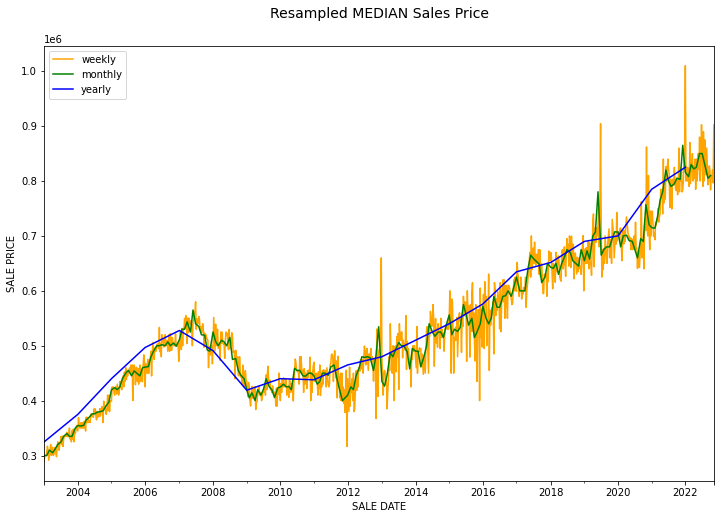

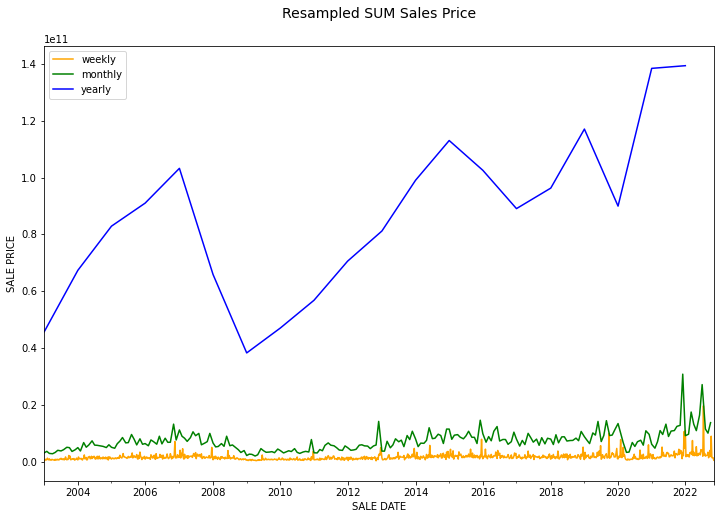

In [41]:
# Plot resampled sales count EQUAL to $0
weekly_count_zero, monthly_count_zero, yearly_count_zero = get_resampled_sales_data(data_by_sales_zero, func='count')
plot_resampled_sales_data(weekly_count_zero, monthly_count_zero, yearly_count_zero, 
                          title='Sales Count = $0', ylabel='SALE COUNT', 
                          linestyle="--", file_path=figurepath)

# Plot resampled sales count GREATER than $0
weekly_count, monthly_count, yearly_count = get_resampled_sales_data(data_by_sales, func='count')
plot_resampled_sales_data(weekly_count, monthly_count, yearly_count, 
                          title='Sales Count > $0', ylabel='SALE COUNT', 
                          linestyle="--", file_path=figurepath)

# Plot mean, median, and sum of resampled sales prices GREATER than $0
weekly_mean, monthly_mean, yearly_mean = get_resampled_sales_data(data_by_sales, func='mean')
plot_resampled_sales_data(weekly_mean, monthly_mean, yearly_mean, 
                          title='Resampled MEAN Sales Price', ylabel='SALE PRICE', 
                          file_path=figurepath)

weekly_median, monthly_median, yearly_median = get_resampled_sales_data(data_by_sales, func='median')
plot_resampled_sales_data(weekly_median, monthly_median, yearly_median, 
                          title='Resampled MEDIAN Sales Price', ylabel='SALE PRICE', 
                          file_path=figurepath)

weekly_sum, monthly_sum, yearly_sum = get_resampled_sales_data(data_by_sales, func='sum')
plot_resampled_sales_data(weekly_sum, monthly_sum, yearly_sum, 
                          title='Resampled SUM Sales Price', ylabel='SALE PRICE', 
                          file_path=figurepath)

__For sales equal to \\$0, we note that these sales counts follow a similar trend to sales greater than \\$0.  However the data and the New York City database does not give further information as to why these registers are equal to \\$0. The only information given is that "There can be a number of reasons for a \$0 sale including transfers of ownership from parents to children." Moving forward we will only analyze sales greater than \\$0.__
__<br><br>__
__For sales equal to \\$0, we note that these sales counts seem to stay steady over weeks and months, but slightly drops over the years - particularly around 2006-2010. In contrast, the mean, median, and sum indicate that sales price increases over the years. We are interested in how sales count and price changed for specific periods of time. Most notably:__
__<br>__
 - 2008 Housing Market Crash
<br>
 - 2020 Coronavirus Pandemic

##### 2. Zoom into a Notable Event: Housing Market Crisis

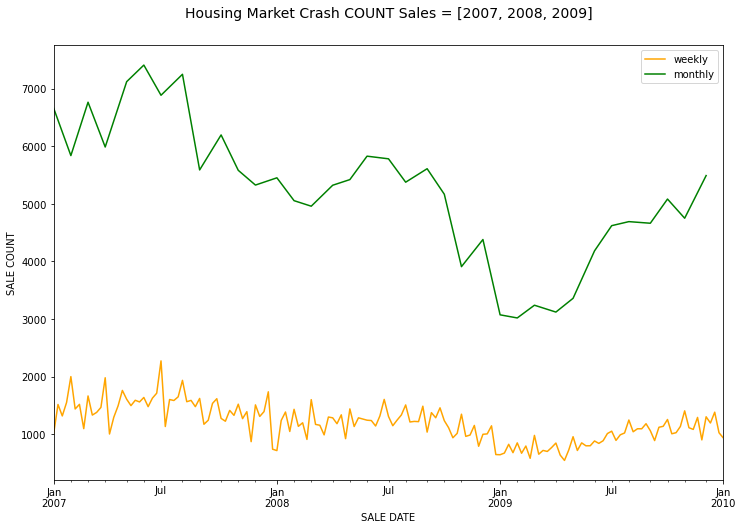

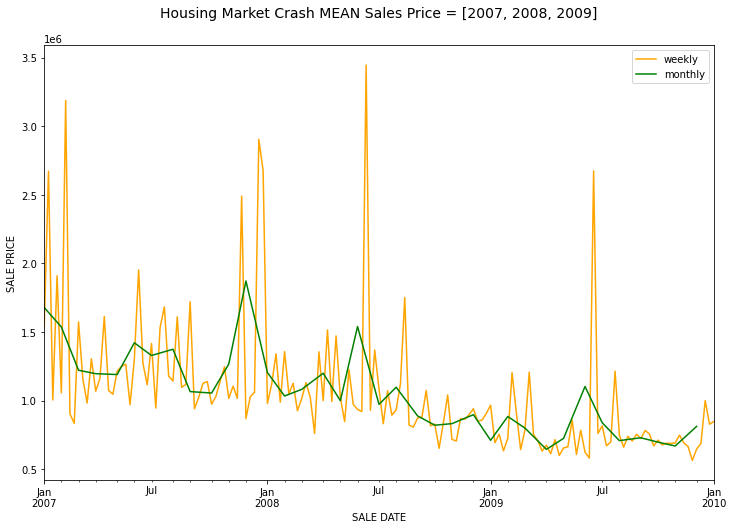

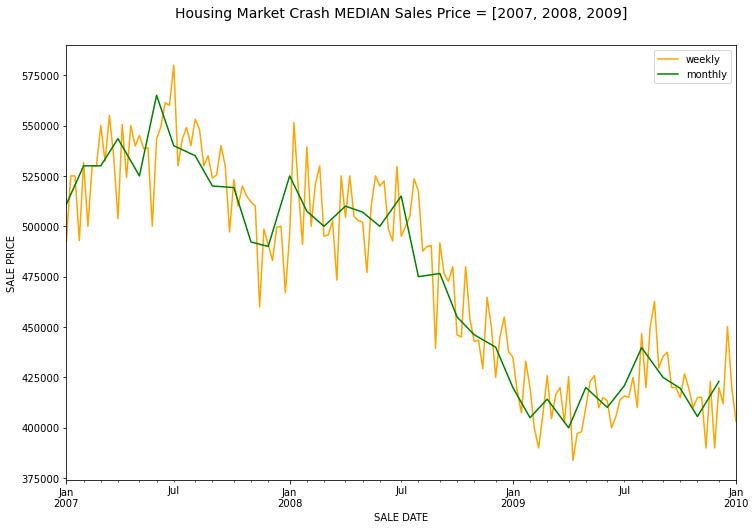

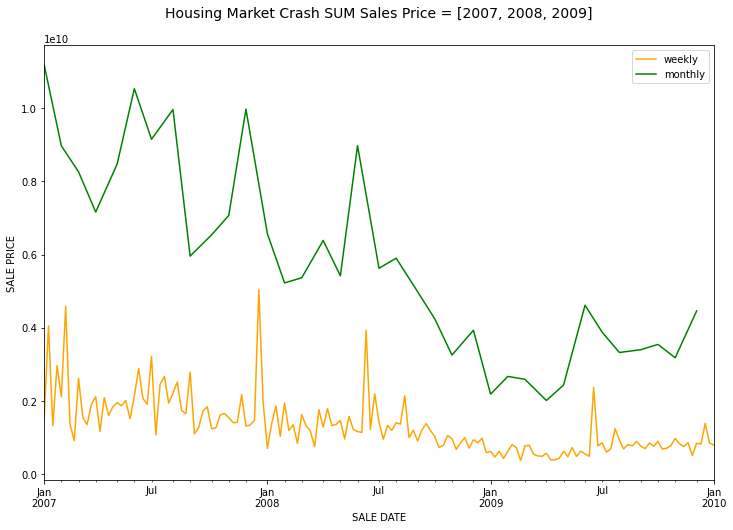

In [43]:
# Zooming into the years around the housing market crash (HMC) in 2008
HMC_years = [2007, 2008, 2009]
HMC_data = data_by_sales[data_by_sales.index.year.isin(HMC_years)]

weekly_count_HMC, monthly_count_HMC, _ = get_resampled_sales_data(HMC_data, func='count')
plot_resampled_sales_data(weekly_count_HMC, monthly_count_HMC, 
                          title='Housing Market Crash COUNT Sales = {}'.format(HMC_years), ylabel='SALE COUNT', 
                          file_path=figurepath)

weekly_mean_HMC, monthly_mean_HMC, _ = get_resampled_sales_data(HMC_data, func='mean')
plot_resampled_sales_data(weekly_mean_HMC, monthly_mean_HMC, 
                          title='Housing Market Crash MEAN Sales Price = {}'.format(HMC_years), ylabel='SALE PRICE', 
                          file_path=figurepath)

weekly_median_HMC, monthly_median_HMC, _ = get_resampled_sales_data(HMC_data, func='median')
plot_resampled_sales_data(weekly_median_HMC, monthly_median_HMC, 
                          title='Housing Market Crash MEDIAN Sales Price = {}'.format(HMC_years), ylabel='SALE PRICE', 
                          file_path=figurepath)

weekly_sum_HMC, monthly_sum_HMC, _ = get_resampled_sales_data(HMC_data, func='sum')
plot_resampled_sales_data(weekly_sum_HMC, monthly_sum_HMC, 
                          title='Housing Market Crash SUM Sales Price = {}'.format(HMC_years), ylabel='SALE PRICE', 
                          file_path=figurepath)


__Looking into the Housing Market Crash__
__<br>__
As expected there is a decrease in sales count from 2007-2009, however in the sales prices you can see peaks in the mean, median, and sum - such that the housing sales prices increased around January 2008 and suddenly dropped. The median and sum more clearly show that there was a gradual decrease in sales prices after the Housing Market Crash.

##### 3. Zoom into a Notable Event: Coronavirus Pandemic

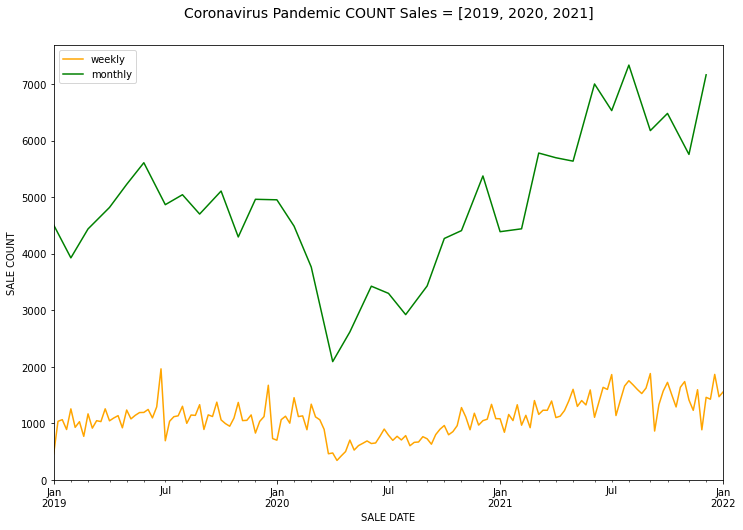

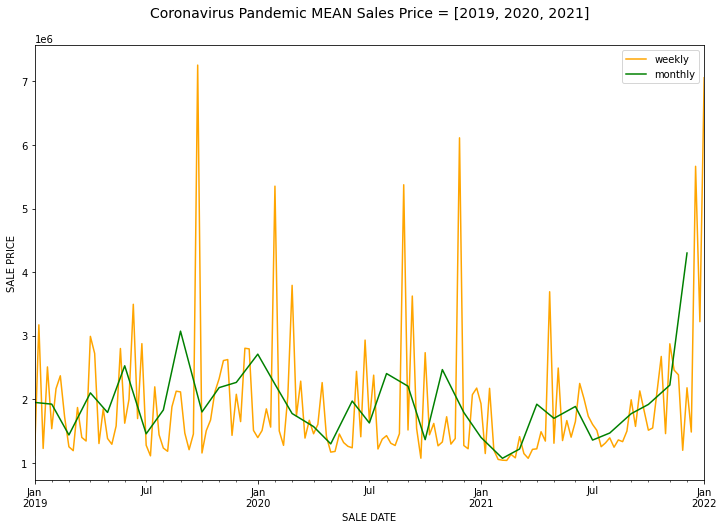

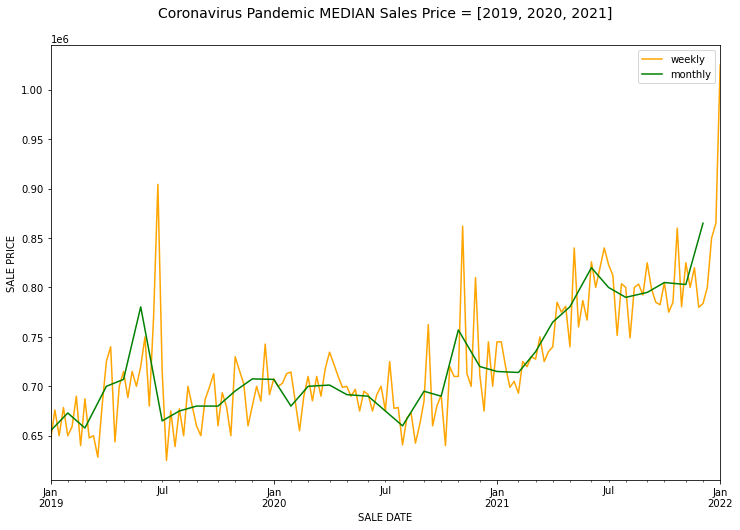

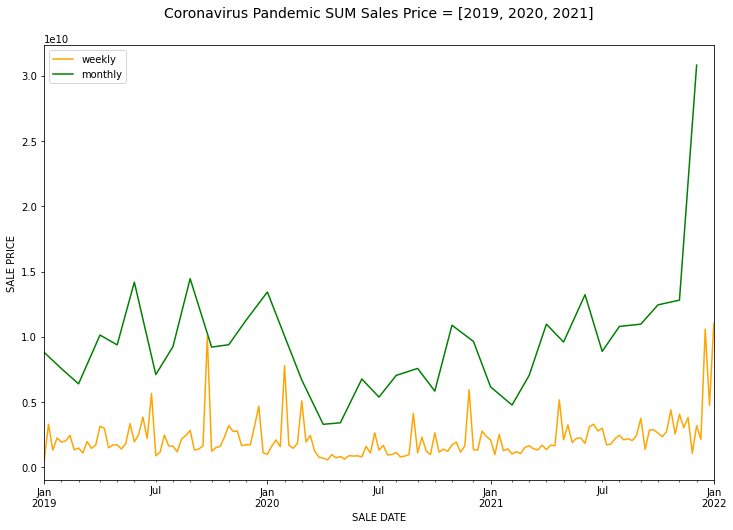

In [45]:
# Zooming into the years around the Coronavirus Pandemic (COVID) in 2020
COVID_years = [2019, 2020, 2021]
COVID_data = data_by_sales[data_by_sales.index.year.isin(COVID_years)]

weekly_count_COVID, monthly_count_COVID, _ = get_resampled_sales_data(COVID_data, func='count')
plot_resampled_sales_data(weekly_count_COVID, monthly_count_COVID, 
                          title='Coronavirus Pandemic COUNT Sales = {}'.format(COVID_years), ylabel='SALE COUNT', 
                          file_path=figurepath)

weekly_mean_COVID, monthly_mean_COVID, _ = get_resampled_sales_data(COVID_data, func='mean')
plot_resampled_sales_data(weekly_mean_COVID, monthly_mean_COVID,
                          title='Coronavirus Pandemic MEAN Sales Price = {}'.format(COVID_years), ylabel='SALE PRICE', 
                          file_path=figurepath)

weekly_median_COVID, monthly_median_COVID, _ = get_resampled_sales_data(COVID_data, func='median')
plot_resampled_sales_data(weekly_median_COVID, monthly_median_COVID, 
                          title='Coronavirus Pandemic MEDIAN Sales Price = {}'.format(COVID_years), ylabel='SALE PRICE', 
                          file_path=figurepath)

weekly_sum_COVID, monthly_sum_COVID, _ = get_resampled_sales_data(COVID_data, func='sum')
plot_resampled_sales_data(weekly_sum_COVID, monthly_sum_COVID, 
                          title='Coronavirus Pandemic SUM Sales Price = {}'.format(COVID_years), ylabel='SALE PRICE', 
                          file_path=figurepath)

__Looking into the Coronavirus Pandemic.__
__<br>__
As expected, there was a sharp decrease in sales count around February 2020, which coincides with lockdown procedures at this time, however the sales count grows during/after the summer of 2020, showing the start of a market recovery trend. Similarly, the mean and sum indicate a drop in sales price before July 2020, however, the median prices are fairly stead through the beginning of 2020. For the mean, median, and sum the prices clearly increase during/after the summer of 2020.
<br><br>
It seems that compared to the Housing Market Crash, the events of the Coronavirus Pandemic in 2020 caused a disruption in the housing market, but it did not stop the growth in the following years.

### (B) Sales prices based on location

##### 1. By Borough

__From this point, we've only looked at sales data across all of New York City, however we are also interested in how sales differ across location. Let us look into the the sales counts, mean, median, and mode between boroughs.__

In [46]:
# Get data for each borough
print("Number of Boroughs:", len(borough_names))
print("Names of Boroughs:\n", borough_names)

# Get data per borough
borough_data = {}
for borough in borough_names:
    borough_data[borough] = data_by_sales[data_by_sales["BOROUGH_NAME"] == borough]

# Color code the boroughs
borough_colors = {"MANHATTAN": "pink", "BRONX": "red", "BROOKLYN": "purple", "QUEENS": "blue", "STATEN ISLAND": "green"}
# Patches for legends
MANH_patch = mpatches.Patch(color='pink', label='MANHATTAN')
BRNX_patch = mpatches.Patch(color='red', label='BRONX')
BRKN_patch = mpatches.Patch(color='purple', label='BROOKLYN')
QUEE_patch = mpatches.Patch(color='blue', label='QUEENS')
STIS_patch = mpatches.Patch(color='green', label='STATEN ISLAND')

Number of Boroughs: 5
Names of Boroughs:
 ['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND']


__First lets look at the Sales Counts, and the Mean, Median, and Sum of Sales by Borough as we did in part (A). For brevity, lets only resample by month.__

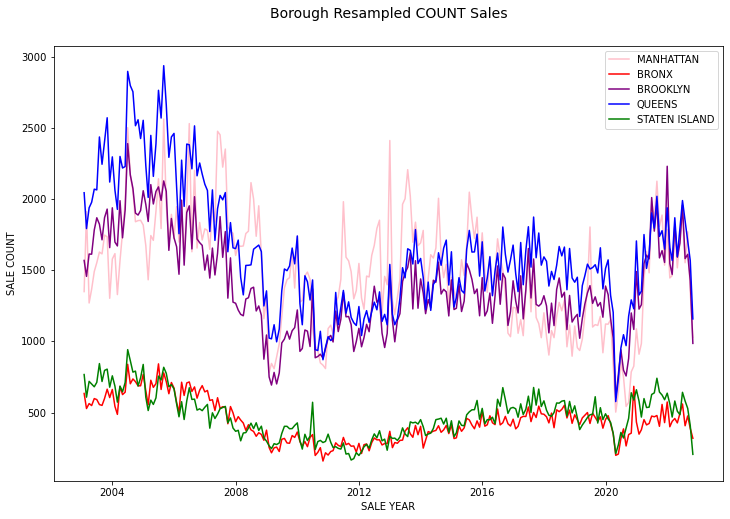

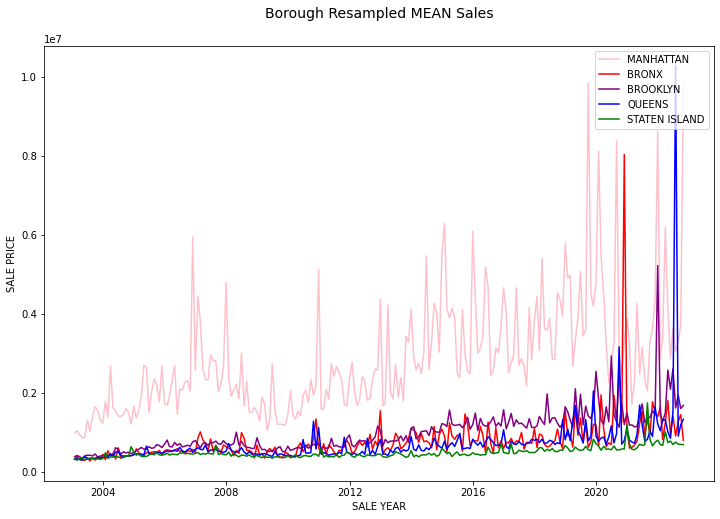

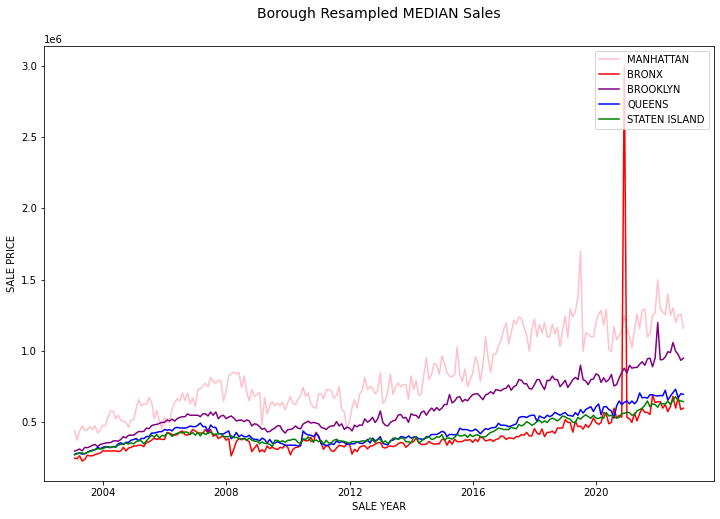

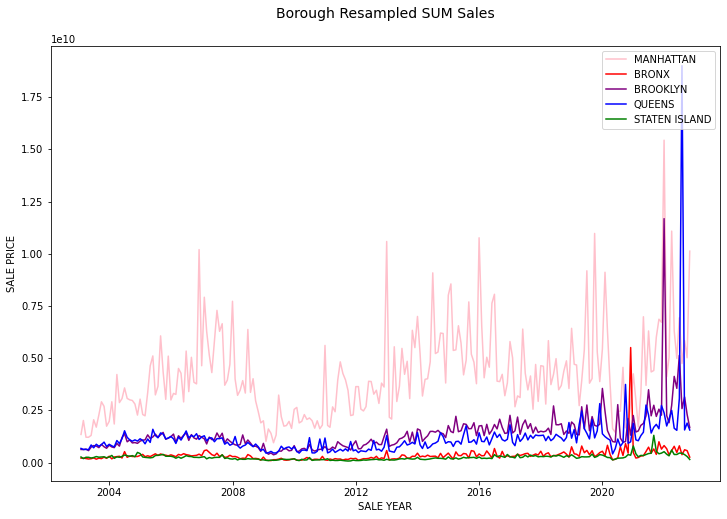

In [47]:
# Plot Monthly Count of Sales, and Mean, Median, and Sum of Sales by Borough
func_list = ['count', 'mean', 'median', 'sum']
for f in func_list:
    fig = plt.figure(figsize=(12,8))
    for borough in borough_names:
        weekly_count_borough, monthly_count_borough, yearly_count_borough = get_resampled_sales_data(borough_data[borough], func=f)
        plt.plot(monthly_count_borough, label=borough, color=borough_colors[borough])
    plt.legend(loc="upper right")
    title = "Borough Resampled {} Sales".format(f.upper())
    plt.title(title, y=1.05, size=14)
    plt.xlabel("SALE YEAR")
    if f == "count":
        plt.ylabel("SALE COUNT")
    else:
        plt.ylabel("SALE PRICE")
    plt.savefig(os.path.join(figurepath, title), transparent=True)
    plt.show()

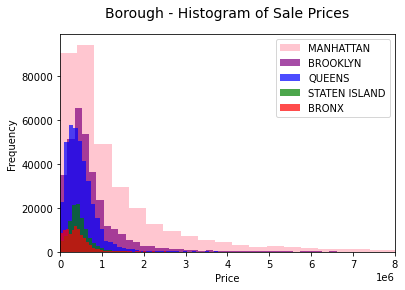

In [53]:
# Plot histogram of sale prices per borough
plt.hist(borough_data["MANHATTAN"]["SALE PRICE"], bins=10000, label="MANHATTAN", alpha=0.9, color=borough_colors["MANHATTAN"])
plt.hist(borough_data["BROOKLYN"]["SALE PRICE"], bins=5000, label="BROOKLYN", alpha=0.7, color=borough_colors["BROOKLYN"])
plt.hist(borough_data["QUEENS"]["SALE PRICE"], bins=5000, label="QUEENS", alpha=0.7, color=borough_colors["QUEENS"])
plt.hist(borough_data["STATEN ISLAND"]["SALE PRICE"], bins=2000, label="STATEN ISLAND", alpha=0.7, color=borough_colors["STATEN ISLAND"])
plt.hist(borough_data["BRONX"]["SALE PRICE"], bins=2000, label="BRONX", alpha=0.7, color=borough_colors["BRONX"])
plt.xlim([0,0.8e7])
title = "Borough - Histogram of Sale Prices"
plt.title(title, y=1.05, size=14)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.savefig(os.path.join(figurepath, title), transparent=True)
plt.show()

Mean, Median, Min, Max - Per Borough


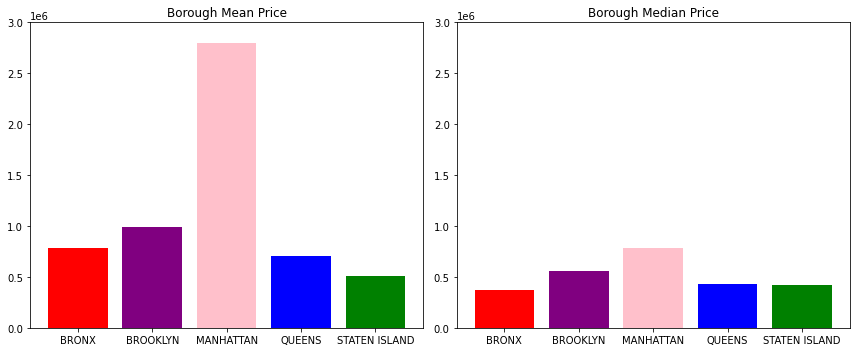

Minimum Prices
BOROUGH_NAME
BRONX            1
BROOKLYN         1
MANHATTAN        1
QUEENS           1
STATEN ISLAND    1
Name: SALE PRICE, dtype: Int64

Maximum Prices
BOROUGH_NAME
BRONX             137298279
BROOKLYN          869612895
MANHATTAN        4111111766
QUEENS            524915655
STATEN ISLAND     189442300
Name: SALE PRICE, dtype: Int64


In [54]:
# Plot bar graphs of sale prices per borough
print("Mean, Median, Min, Max - Per Borough")
print("="*100)
mean_price_b, median_price_b, min_price_b, max_price_b = get_saleprice_stats_groupby(data_by_sales, "BOROUGH_NAME")

fig, ax = plt.subplots(1,2, figsize=(12, 5), tight_layout = True)
min_ylim = 0
max_ylim = 3e6
# Mean Prices for Boroughs
ax[0].bar(mean_price_b.index, mean_price_b.values, color=[borough_colors[b] for b in mean_price_b.index])
ax[0].set_title("Borough Mean Price")
ax[0].set_ylim([min_ylim, max_ylim])
# Median Prices for Boroughs
ax[1].bar(median_price_b.index, median_price_b.values, color=[borough_colors[b] for b in mean_price_b.index])
ax[1].set_title("Borough Median Price")
ax[1].set_ylim([min_ylim, max_ylim])
title = "Borough - Mean and Median Sales Prices"
plt.savefig(os.path.join(figurepath, title), transparent=True)
plt.show()
# Minimum Prices for Boroughs
print("Minimum Prices")
print(min_price_b)
print()
# Maximum Prices for Boroughs
print("Maximum Prices")
print(max_price_b)

__Next, we'll plot a box-and-whisker graph for each of the five boroughs so we can have an idea of the price distribution for each of them__

In [61]:
data_value.columns

Index(['BOROUGH', 'BOROUGH_NAME', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'SALE YEAR', 'SALE MONTH'],
      dtype='object')

/var/folders/0p/jxmy09910dvd37j3qv0_1df80000gn/T/ipykernel_9552/3829112153.py:44: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.3, wspace=0.2)


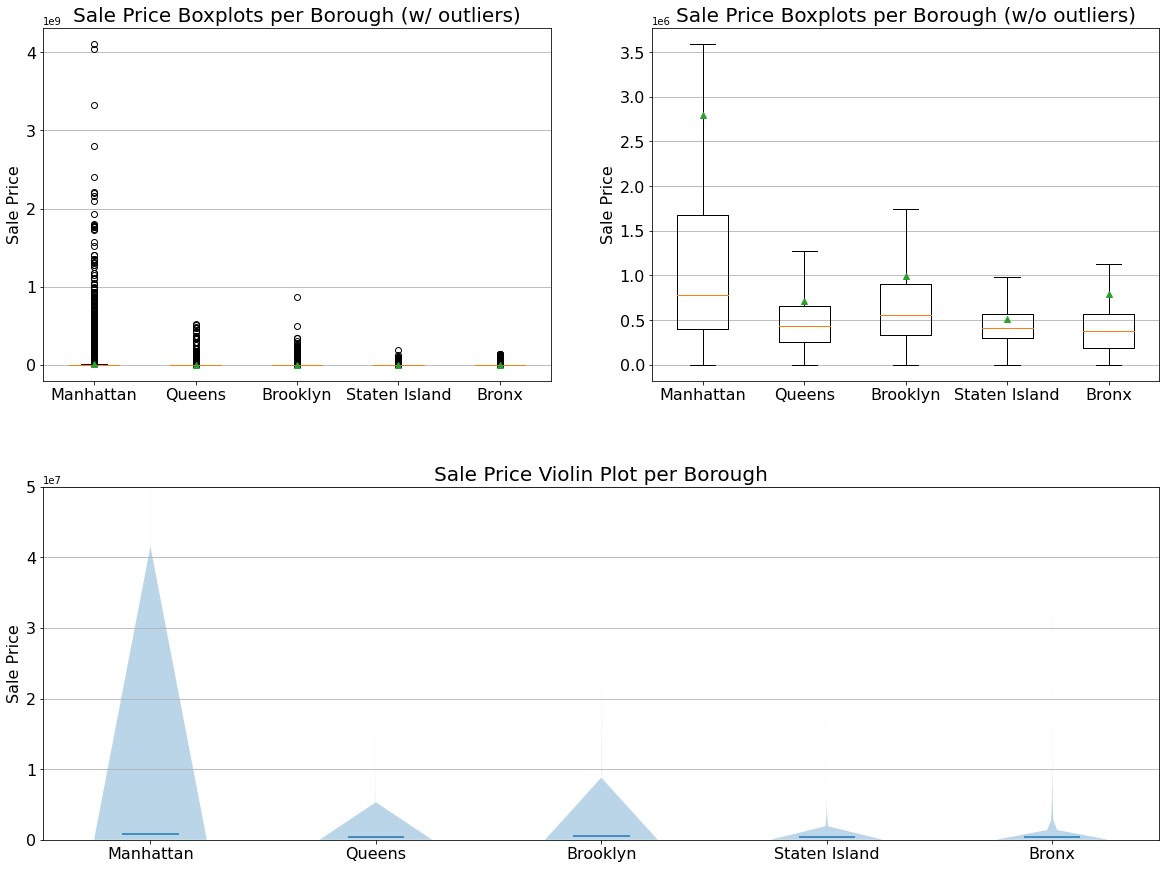

In [161]:
# We'll first transform the 'SALE PRICE' feature for each borough into a list
price_manhattan = data_value[data_value['BOROUGH_NAME'] == 'MANHATTAN']['SALE PRICE'].tolist()
price_queens = data_value[data_value['BOROUGH_NAME'] == 'QUEENS']['SALE PRICE'].tolist()
price_brooklyn = data_value[data_value['BOROUGH_NAME'] == 'BROOKLYN']['SALE PRICE'].tolist()
price_statenisland = data_value[data_value['BOROUGH_NAME'] == 'STATEN ISLAND']['SALE PRICE'].tolist()
price_bronx = data_value[data_value['BOROUGH_NAME'] == 'BRONX']['SALE PRICE'].tolist()

# now we'll plot the box-plots
plot_vals = [price_manhattan, price_queens, price_brooklyn, price_statenisland, price_bronx]

fig = plt.figure(constrained_layout=True, figsize=(20,12))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs [0,0])
ax2 = fig.add_subplot(gs [0,1])
ax3 = fig.add_subplot(gs [1,:])

labels = ['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx']

ax1.boxplot(plot_vals, labels = ['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx'], 
           showmeans=True,
           showfliers=True)
ax1.set_ylabel('Sale Price', size=16)
ax1.set_title('Sale Price Boxplots per Borough (w/ outliers)', size=20)
ax1.yaxis.grid(True)
ax1.set_xticklabels(labels, fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)

ax2.boxplot(plot_vals, labels = ['Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx'], 
           showmeans=True,
           showfliers=False)
ax2.set_ylabel('Sale Price', size=16)
ax2.set_title('Sale Price Boxplots per Borough (w/o outliers)', size=20)
ax2.yaxis.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=16)

ax3.violinplot(plot_vals, showmeans=False, showmedians=True, showextrema=False)
ax3.set_ylabel('Sale Price', size=16)
ax3.set_title('Sale Price Violin Plot per Borough', size=20)
ax3.set_xticks([y + 1 for y in range(len(labels))],
                  labels=labels, size=16)
ax3.set_ylim(0, 50000000)
ax3.yaxis.grid(True)
ax3.tick_params(axis='both', which='major', labelsize=16)
fig.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.3, wspace=0.2)

__From the box-plots and violin plots above, we can draw the following conclusions:__

(a) Manhattan is the Borough with the highest mean, median, standard-deviation and interquartile values. This means that it is not only the most expensive, but also the most "diverse" Borough (in terms of the values of properties)

(b) All the other 4 Boroughs have similar median property value. However, out of them, Brooklyn is the one with most "diverse" properties, while Staten Island is the least "diverse" (actually, the mean and median are almost the same, and its distributions is similar to a normal distribution)

(c) If one is looking for a plethora of options regarding a property's price, then their should start with Manhattan, followed by Brooklyn.

##### 2. By Neigherborhood

In [55]:
# Note how many neighborhoods exist in the dataset
print("Number of Neighborhoods: ", len(data["NEIGHBORHOOD"].unique()))

# Map neighborhoods to borough
nbor_2_borough = {}
for borough in borough_names:
    for nbor in borough_data[borough]["NEIGHBORHOOD"].unique():
        nbor_2_borough[nbor] = borough

def get_borough_colors(neighborhood_list):
    '''Color code neighborhoods based on thte boroughs'''
    nbor_colors = [borough_colors[nbor_2_borough[nbor]] for nbor in neighborhood_list]
    return nbor_colors

Number of Neighborhoods:  267


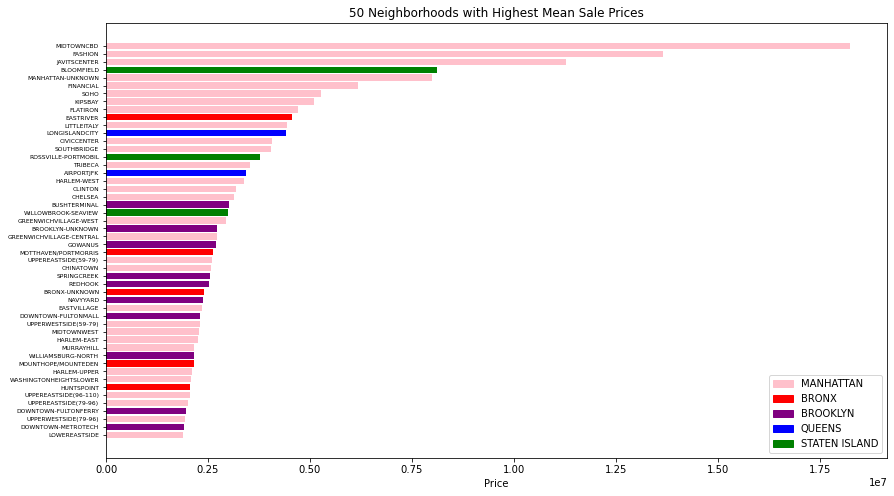

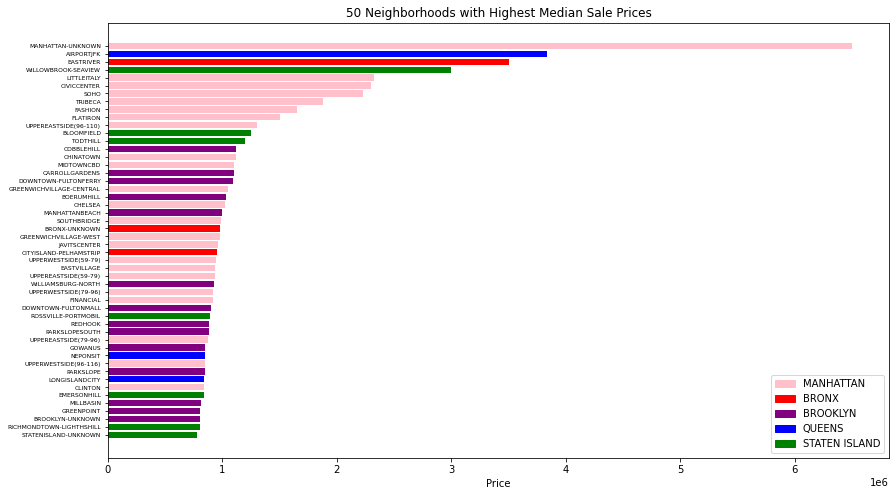

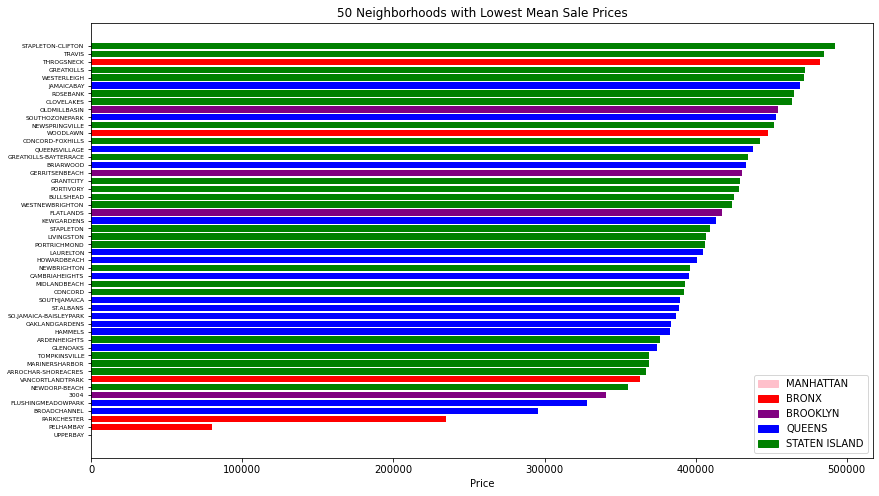

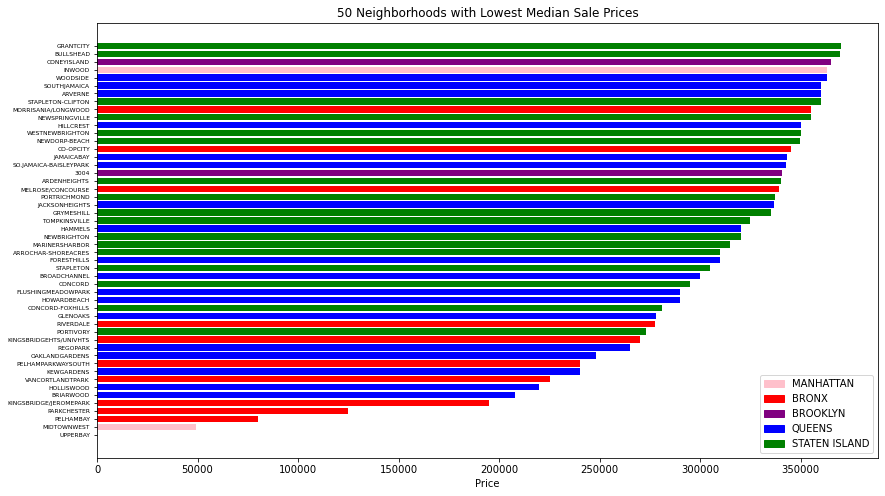

In [58]:
# Plot bar graphs of sale prices per for most/least expensive neighborhoods
n = 50
figsize = (14,8)
mean_price_n, median_price_n, _, _ = get_saleprice_stats_groupby(data_by_sales, "NEIGHBORHOOD")
mean_price_n, median_price_n = mean_price_n.sort_values(ascending=True), median_price_n.sort_values(ascending=True)

titles = ["{} Neighborhoods with Highest Mean Sale Prices".format(n),
          "{} Neighborhoods with Highest Median Sale Prices".format(n),
          "{} Neighborhoods with Lowest Mean Sale Prices".format(n),
          "{} Neighborhoods with Lowest Median Sale Prices".format(n)]

price_n = [mean_price_n[-n:],   #top n
           median_price_n[-n:], #top n
           mean_price_n[:n],    #bottom n
           median_price_n[:n]]  #bottom n

for i, price_n in enumerate(price_n):
    fig = plt.figure(figsize=figsize)
    plt.barh(price_n.index, price_n.values, color=get_borough_colors(price_n.index))
    plt.title(titles[i])
    plt.xlabel("Price")
    plt.yticks(fontsize=6)
    plt.legend(handles=[MANH_patch, BRNX_patch, BRKN_patch, QUEE_patch, STIS_patch])
    plt.savefig(os.path.join(figurepath, titles[i]), transparent=True)
    plt.show()


__From the graphs above, we can see that the neighborhood with the highest mean 'Sale Price' are located in Manhattan, while the ones with the lowest mean values are in Queens and Staten Island.__

### (C) Features Correlation

__For this part, we'll find the attributes with higher positive or negative correlation with the dependent variable 'SALE PRICE'. For that, we'll use the dataframe 'data_value', which contains the registers with 'SALE PRICE' higher than zero.__

In [202]:
# we will start by copying the 'data_value' dataframe
data_correl = data_value.copy()

In [203]:
# then will drop the rows with missing values
data_correl.dropna(inplace=True)
data_correl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000661 entries, 26373 to 1767985
Data columns (total 24 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   BOROUGH                         1000661 non-null  Int64         
 1   BOROUGH_NAME                    1000661 non-null  object        
 2   NEIGHBORHOOD                    1000661 non-null  string        
 3   BUILDING CLASS CATEGORY         1000661 non-null  string        
 4   TAX CLASS AT PRESENT            1000661 non-null  string        
 5   BLOCK                           1000661 non-null  Int64         
 6   LOT                             1000661 non-null  Int64         
 7   EASE-MENT                       1000661 non-null  string        
 8   BUILDING CLASS AT PRESENT       1000661 non-null  string        
 9   ADDRESS                         1000661 non-null  string        
 10  APARTMENT NUMBER                100066

In [204]:
# then we'll drop the textual attributes
data_correl = data_correl.select_dtypes(exclude=['string'])
data_correl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000661 entries, 26373 to 1767985
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   BOROUGH                    1000661 non-null  Int64         
 1   BOROUGH_NAME               1000661 non-null  object        
 2   BLOCK                      1000661 non-null  Int64         
 3   LOT                        1000661 non-null  Int64         
 4   ZIP CODE                   1000661 non-null  Int64         
 5   RESIDENTIAL UNITS          1000661 non-null  Int64         
 6   COMMERCIAL UNITS           1000661 non-null  Int64         
 7   TOTAL UNITS                1000661 non-null  Int64         
 8   LAND SQUARE FEET           1000661 non-null  Int64         
 9   GROSS SQUARE FEET          1000661 non-null  Int64         
 10  YEAR BUILT                 1000661 non-null  Int64         
 11  TAX CLASS AT TIME OF SALE  100066

In [205]:
# we'll also drop the 'BOROUGH' since we have the 'BOROUGH_NAME' which will suffer 'one-hot encoding' later
del data_correl['BOROUGH']

# and we'll drop the 'SALE MONTH' since it is textual and recreate it numberically from 'SALE DATE'
del data_correl['SALE MONTH']

data_correl['SALE MONTH'] = data_correl['SALE DATE'].dt.month

data_correl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000661 entries, 26373 to 1767985
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   BOROUGH_NAME               1000661 non-null  object        
 1   BLOCK                      1000661 non-null  Int64         
 2   LOT                        1000661 non-null  Int64         
 3   ZIP CODE                   1000661 non-null  Int64         
 4   RESIDENTIAL UNITS          1000661 non-null  Int64         
 5   COMMERCIAL UNITS           1000661 non-null  Int64         
 6   TOTAL UNITS                1000661 non-null  Int64         
 7   LAND SQUARE FEET           1000661 non-null  Int64         
 8   GROSS SQUARE FEET          1000661 non-null  Int64         
 9   YEAR BUILT                 1000661 non-null  Int64         
 10  TAX CLASS AT TIME OF SALE  1000661 non-null  Int64         
 11  SALE PRICE                 100066

In [206]:
# now we can drop the 'SALE DATE' variable
del data_correl['SALE DATE']

In [209]:
# finally, let's apply the 'one-hot encoding' method to the categorical attribute 'BOROUGH'
data_correl = pd.get_dummies(data_correl)

# verifying the new created columns 
data_correl.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE YEAR', 'SALE MONTH',
       'BOROUGH_NAME_BRONX', 'BOROUGH_NAME_BROOKLYN', 'BOROUGH_NAME_MANHATTAN',
       'BOROUGH_NAME_QUEENS', 'BOROUGH_NAME_STATEN ISLAND'],
      dtype='object')

Text(0.5, 1.0, 'Features Correlation Matrix')

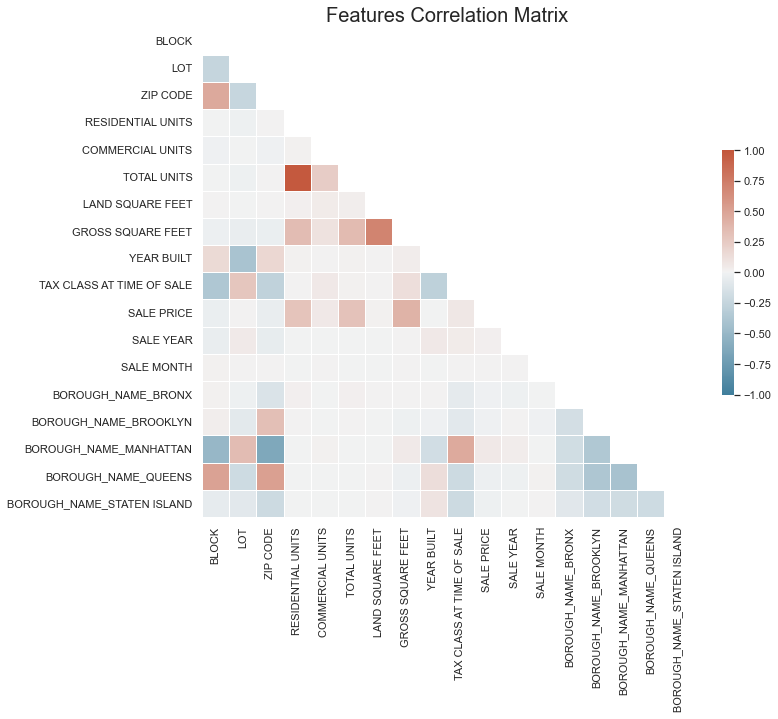

In [231]:
# Plotting the diagonal correlation matrix
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_correl.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Features Correlation Matrix', size=20)

Text(0.5, 1.0, 'Features Correlation Matrix (with values)')

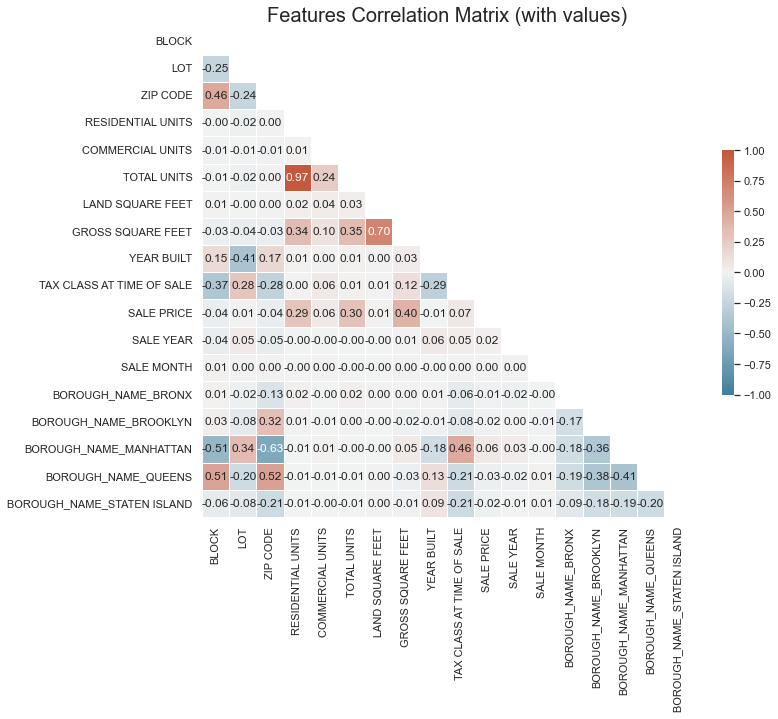

In [232]:
# Plotting the diagonal correlation matrix
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data_correl.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio with values
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
ax.set_title('Features Correlation Matrix (with values)', size=20)

__Based on the Correlation Matrix above, we can draw to the following conclusions:__

The variable 'Sale Price' does not have a strong correlation (either positive or negative) with any other attributes. The three most significant correlations are, in order: (1) 'Gross Square Feet' (correlation = 0.40), meaning that the size of the property is the most important factor, and it is way more important than 'Land Square Feet', another variable related to the property's size whose correlation = 0.01; (2) 'Total Units' (correlation = 0.30), which shows that bigger and taller buildings (residential and commercial) tend to be more valuable, especially considering that they're most of the times located in Manhattan; and (3) 'Residential Units' (correlation = 0.29), which shows the importance of residential condos for the property's value.

As a result of such low correlations, we would need more information from other new features to get a better sense of what are the variables that could explain the 'Sale Price' attribute, such as 'number of rooms', 'number of bathrooms', and building's attributes/characteristics/equipment. 